<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/pretrained_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from IPython.display import YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [74]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import torch

### Using `pytorch` to build convolutional network

![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

In [75]:
from IPython.display import Image

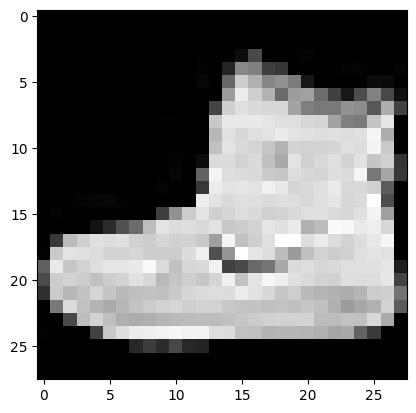

In [76]:
train = FashionMNIST('.', download = True)
plt.imshow(train[0][0], cmap = 'gray')

In [77]:
train = FashionMNIST('.', download = True, transform=ToTensor())
trainloader = DataLoader(train, batch_size = 32)

In [78]:
train[0][0].shape

torch.Size([1, 28, 28])

In [79]:
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding = 1)

In [80]:
output = conv1(train[0][0].unsqueeze(0))

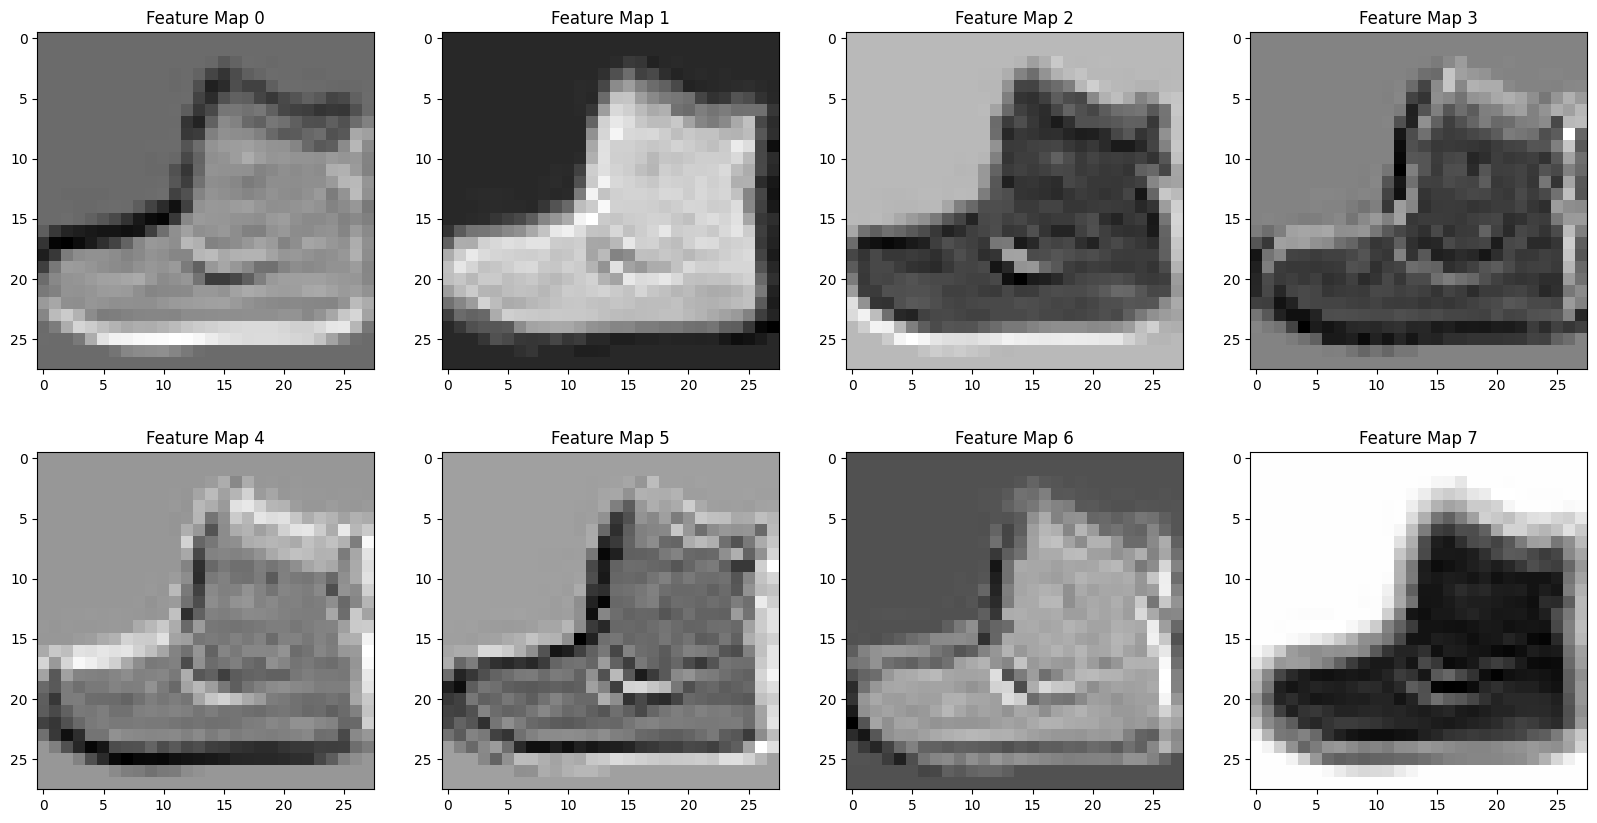

In [81]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(4):
    ax[i, j].imshow(output[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [82]:
pool = nn.MaxPool2d(2)

In [83]:
output_pool = pool(output)

In [84]:
output_pool[0].shape

torch.Size([8, 14, 14])

In [85]:
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding = 1)

In [86]:
output_conv2 = conv2(output_pool)


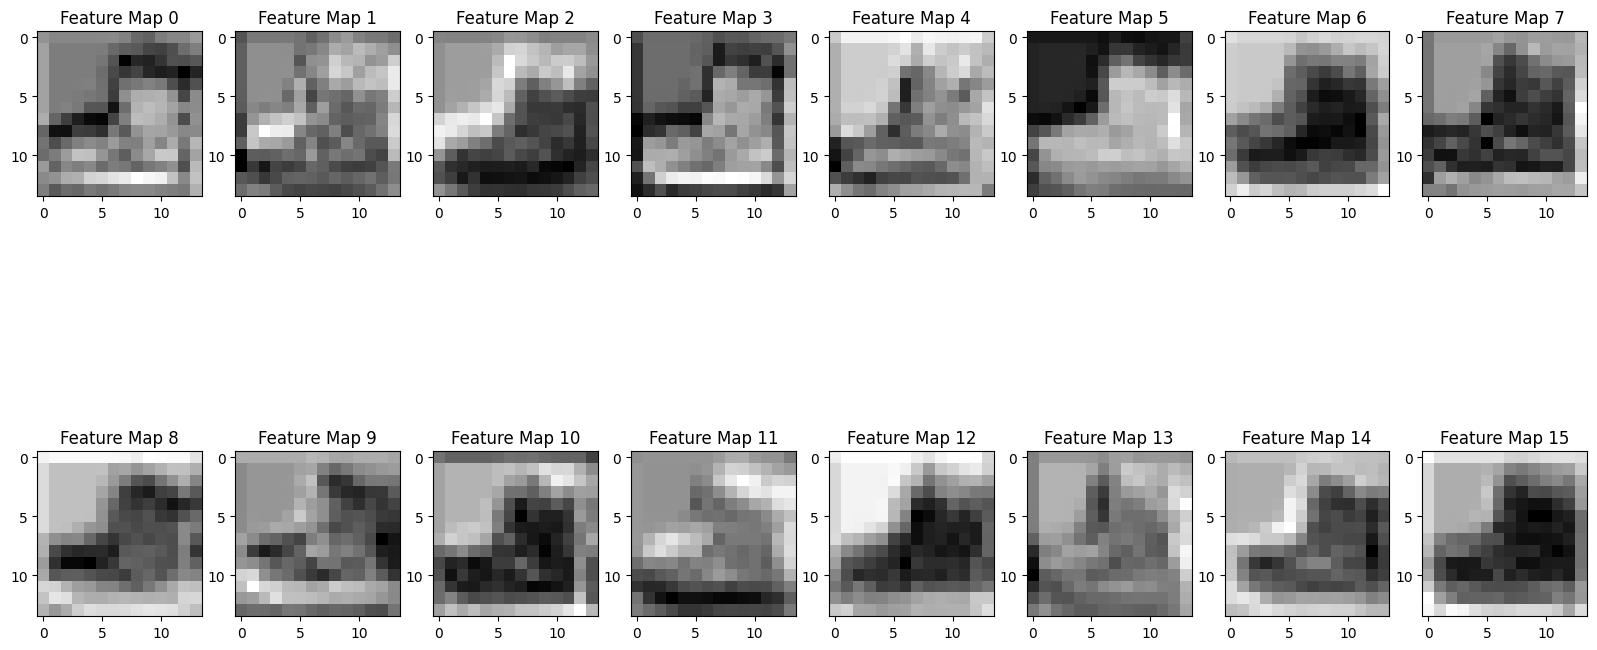

In [87]:
fig, ax = plt.subplots(2, 8, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(output_conv2[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [88]:
flattener = nn.Flatten()

In [89]:
flattener(output_conv2)

tensor([[-0.2043, -0.2289, -0.2289,  ..., -0.1673, -0.2749, -0.1196]],
       grad_fn=<ViewBackward0>)

In [90]:
flattener(pool(output_conv2)).shape

torch.Size([1, 784])

In [91]:
16*7*7

784

In [92]:
linear1 = nn.Linear(in_features=16*7*7, out_features=128)
linear2 = nn.Linear(in_features = 128, out_features = 10)
conv_activation = nn.Tanh()
linear_activation = nn.ReLU()

In [93]:
model = nn.Sequential(conv1, conv_activation, pool,
                      conv2, conv_activation, pool,
                      flattener,
                      linear1, linear_activation,
                      linear2)

In [94]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [95]:
loss_fn = nn.CrossEntropyLoss()

In [96]:
from tqdm import tqdm

In [97]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [98]:
losses = []
for epoch in tqdm(range(20)):
  for X, y in trainloader:
    X, y = X.to(device), y.to(device)
    yhat = model(X)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [00:09<02:56,  9.30s/it]

Epoch 0 Loss: 0.6240401268005371


 10%|█         | 2/20 [00:18<02:46,  9.22s/it]

Epoch 1 Loss: 0.48121029138565063


 15%|█▌        | 3/20 [00:27<02:37,  9.24s/it]

Epoch 2 Loss: 0.40845102071762085


 20%|██        | 4/20 [00:36<02:27,  9.22s/it]

Epoch 3 Loss: 0.3619285821914673


 25%|██▌       | 5/20 [00:46<02:18,  9.21s/it]

Epoch 4 Loss: 0.32230645418167114


 30%|███       | 6/20 [00:55<02:08,  9.17s/it]

Epoch 5 Loss: 0.2878933548927307


 35%|███▌      | 7/20 [01:04<01:59,  9.20s/it]

Epoch 6 Loss: 0.2637583017349243


 40%|████      | 8/20 [01:13<01:50,  9.19s/it]

Epoch 7 Loss: 0.2452261745929718


 45%|████▌     | 9/20 [01:22<01:41,  9.19s/it]

Epoch 8 Loss: 0.2309127002954483


 50%|█████     | 10/20 [01:31<01:31,  9.17s/it]

Epoch 9 Loss: 0.22048822045326233


 55%|█████▌    | 11/20 [01:41<01:22,  9.18s/it]

Epoch 10 Loss: 0.2124137431383133


 60%|██████    | 12/20 [01:50<01:13,  9.17s/it]

Epoch 11 Loss: 0.20002426207065582


 65%|██████▌   | 13/20 [01:59<01:04,  9.18s/it]

Epoch 12 Loss: 0.19425082206726074


 70%|███████   | 14/20 [02:08<00:55,  9.17s/it]

Epoch 13 Loss: 0.18743440508842468


 75%|███████▌  | 15/20 [02:17<00:46,  9.21s/it]

Epoch 14 Loss: 0.1838293969631195


 80%|████████  | 16/20 [02:27<00:36,  9.24s/it]

Epoch 15 Loss: 0.18296390771865845


 85%|████████▌ | 17/20 [02:36<00:27,  9.22s/it]

Epoch 16 Loss: 0.17775630950927734


 90%|█████████ | 18/20 [02:45<00:18,  9.22s/it]

Epoch 17 Loss: 0.17616836726665497


 95%|█████████▌| 19/20 [02:54<00:09,  9.20s/it]

Epoch 18 Loss: 0.17192736268043518


100%|██████████| 20/20 [03:04<00:00,  9.20s/it]

Epoch 19 Loss: 0.16649329662322998


In [99]:
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Tanh()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
)

Exploring what the network is paying attention to by visualizing the results of the convolutions after being trained for 20 epochs.  

In [100]:
x = train[0][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)


Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


In [101]:
x.shape

torch.Size([16, 7, 7])

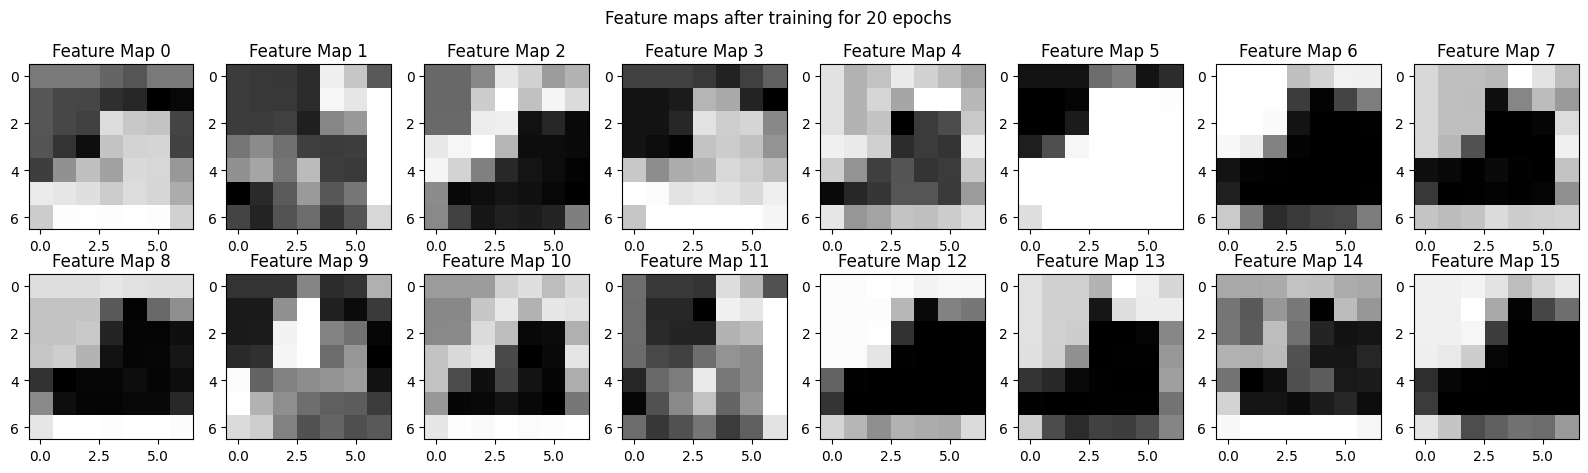

In [102]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [103]:
x = train[1][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)

Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


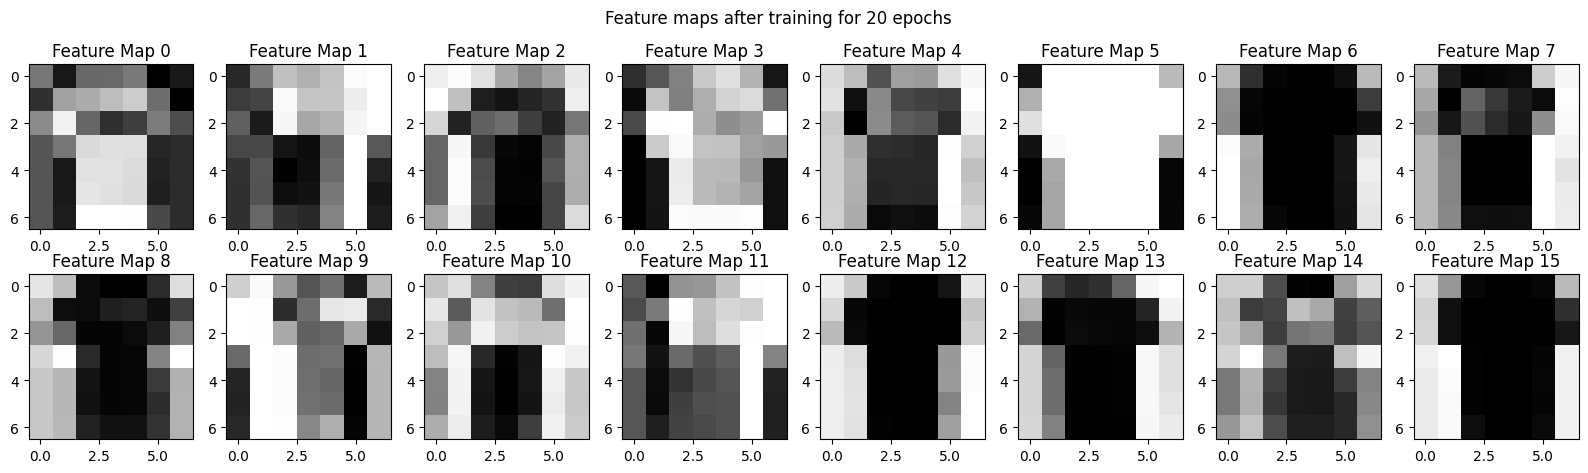

In [104]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [105]:
correct = 0
total = 0
for x, y in trainloader:
  x, y = x.to(device), y.to(device)
  yhat = model(x)
  correct += (torch.argmax(yhat, dim = 1) == y).sum()
  total += len(y)

In [106]:
correct/total

tensor(0.9145, device='cuda:0')

In [107]:
torch.save(model, 'fashionmodel.pt')

**PROBLEM 2**

Below, a dataset containing 10 images of

In [108]:
from torchvision.datasets import CIFAR10

In [109]:
train = CIFAR10(root = '.', download = True, transform=ToTensor())

In [110]:
train[0][0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [111]:
from torchvision.utils import make_grid

In [112]:
grid = make_grid([train[i][0] for i in range(16)], nrow=4)

In [113]:
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

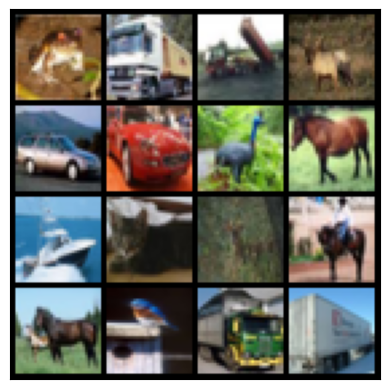

In [114]:
show(grid)

In [115]:
train[0][0].shape

torch.Size([3, 32, 32])

In [116]:
from torchvision.models import resnet50, ResNet50_Weights

In [117]:
#loading in the prebuilt model weights
weights = ResNet50_Weights.DEFAULT
#loads in the transformations to the images that need
#to happen before the image goes into the network
transforms = weights.transforms()

In [118]:
#load model and weights
model = resnet50(weights = weights)

In [119]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [120]:
#changing the output of model to reflect my task
#(classify 10 images)
model.fc = nn.Linear(in_features=2048, out_features=10)

In [121]:
trainloader = DataLoader(train, batch_size = 32)

In [122]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [123]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [124]:
from tqdm import tqdm

In [125]:
model = model.to(device)
for epoch in tqdm(range(5)):
  for x,y in trainloader:
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

 20%|██        | 1/5 [01:00<04:02, 60.60s/it]

Epoch 0 Loss: 0.443512499332428


 40%|████      | 2/5 [02:01<03:01, 60.67s/it]

Epoch 1 Loss: 0.03791072964668274


 60%|██████    | 3/5 [03:01<02:01, 60.64s/it]

Epoch 2 Loss: 0.010015585459768772


 80%|████████  | 4/5 [04:02<01:00, 60.69s/it]

Epoch 3 Loss: 0.003573881695047021


100%|██████████| 5/5 [05:03<00:00, 60.71s/it]

Epoch 4 Loss: 0.0020789257250726223


In [126]:
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    x,y = x.to(device), y.to(device)
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [127]:
correct/total

tensor(0.9999, device='cuda:0')

In [128]:
torch.save(model, 'cifarmodel.pt')

In [129]:
weights = ResNet50_Weights.DEFAULT #pretrained weights
transforms = weights.transforms() #transforms to get your pictures in right format
model = resnet50(weights = weights) #model with pretrained weights

In [130]:
model.fc = nn.Linear(2048, 2)

In [131]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
path = 'drive/MyDrive/small/train/'

In [134]:
train = ImageFolder(path, transform=transforms)
val = ImageFolder('drive/MyDrive/small/val/', transform = transforms)

In [135]:
trainloader = DataLoader(train, batch_size = 32)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [136]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [137]:
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [138]:
model = model.to(device)
for epoch in tqdm(range(20)):
  for x,y in trainloader:
    #x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [07:29<2:22:20, 449.48s/it]

Epoch 0 Loss: 0.032187268137931824


 10%|█         | 2/20 [07:43<57:58, 193.23s/it]  

Epoch 1 Loss: 0.04100547358393669


 15%|█▌        | 3/20 [07:57<31:33, 111.36s/it]

Epoch 2 Loss: 0.04933271184563637


 20%|██        | 4/20 [08:11<19:28, 73.00s/it] 

Epoch 3 Loss: 0.05130157247185707


 25%|██▌       | 5/20 [08:25<12:56, 51.76s/it]

Epoch 4 Loss: 0.046214211732149124


 30%|███       | 6/20 [08:39<09:05, 38.93s/it]

Epoch 5 Loss: 0.03925099968910217


 35%|███▌      | 7/20 [08:53<06:39, 30.75s/it]

Epoch 6 Loss: 0.032423924654722214


 40%|████      | 8/20 [09:07<05:05, 25.43s/it]

Epoch 7 Loss: 0.026468997821211815


 45%|████▌     | 9/20 [09:21<04:00, 21.85s/it]

Epoch 8 Loss: 0.021471811458468437


 50%|█████     | 10/20 [09:35<03:13, 19.40s/it]

Epoch 9 Loss: 0.017339862883090973


 55%|█████▌    | 11/20 [09:49<02:39, 17.72s/it]

Epoch 10 Loss: 0.014069871045649052


 60%|██████    | 12/20 [10:03<02:12, 16.56s/it]

Epoch 11 Loss: 0.011467483825981617


 65%|██████▌   | 13/20 [10:17<01:50, 15.76s/it]

Epoch 12 Loss: 0.009450995363295078


 70%|███████   | 14/20 [10:31<01:31, 15.23s/it]

Epoch 13 Loss: 0.007936176843941212


 75%|███████▌  | 15/20 [10:45<01:14, 14.91s/it]

Epoch 14 Loss: 0.0067551457323133945


 80%|████████  | 16/20 [10:59<00:58, 14.66s/it]

Epoch 15 Loss: 0.005848728120326996


 85%|████████▌ | 17/20 [11:13<00:43, 14.45s/it]

Epoch 16 Loss: 0.00511411065235734


 90%|█████████ | 18/20 [11:27<00:28, 14.40s/it]

Epoch 17 Loss: 0.004525558557361364


 95%|█████████▌| 19/20 [11:41<00:14, 14.25s/it]

Epoch 18 Loss: 0.004033762961626053


100%|██████████| 20/20 [11:55<00:00, 35.77s/it]

Epoch 19 Loss: 0.0036273363512009382


In [139]:
torch.save(model, 'catdog.pt')

In [140]:
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    x,y = x.to(device), y.to(device)
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [141]:
correct/total

tensor(0.9852, device='cuda:0')

In [142]:
valloader = DataLoader(val, batch_size=32)

In [143]:
correct = 0
total = 0
model = model.to(device)
model.eval()
for x,y in tqdm(valloader):
    x,y = x.to(device), y.to(device)
    #x = transforms(x)
    #x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

100%|██████████| 34/34 [15:42<00:00, 27.71s/it]


In [144]:
correct/total

tensor(0.9185, device='cuda:0')

### Example with Mobilenet V3

In [145]:
from torchvision.models import MobileNet_V3_Small_Weights, mobilenetv3

In [146]:
weights = MobileNet_V3_Small_Weights.DEFAULT
transforms = weights.transforms()

In [147]:
model = mobilenetv3.mobilenet_v3_small(weights = weights)

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


100%|██████████| 9.83M/9.83M [00:00<00:00, 218MB/s]


In [148]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [149]:
from torchvision.io import read_image

In [150]:
cat = read_image('catpic.png')

RuntimeError: [Errno 2] No such file or directory: 'catpic.png'

In [ ]:
cat

In [ ]:
cat.shape

In [ ]:
x = transforms(cat[:-1, :, :])

In [ ]:
x.unsqueeze(0).shape

In [ ]:
output = model(x.unsqueeze(0))

In [ ]:
import torch

In [ ]:
torch.argmax(output, dim = 1)

In [ ]:
from IPython.display import Image

In [ ]:
Image('catpic.png')

In [ ]:
weights.meta['categories'][87]